<a href="https://colab.research.google.com/github/Parinita-Jain/Course_Handouts_NLP_using_DL/blob/main/Text_classification_with_DL_using_glove_and_simple_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

# preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [21]:
df = pd.read_csv("/content/review.csv")
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [22]:
negative = " ".join(df[df["sentiment"] == 0]["review"])
positive = " ".join(df[df["sentiment"] == 1]["review"])

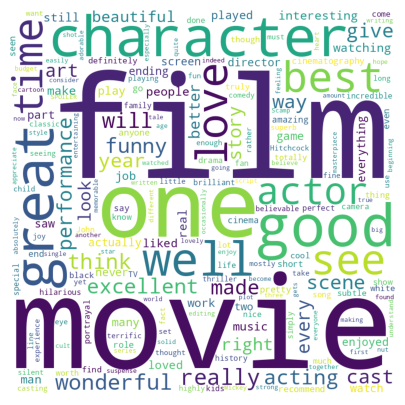

In [23]:
wc = WordCloud(width = 800, height = 800,
              background_color ='white',
              min_font_size = 10)

wc.generate(positive)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

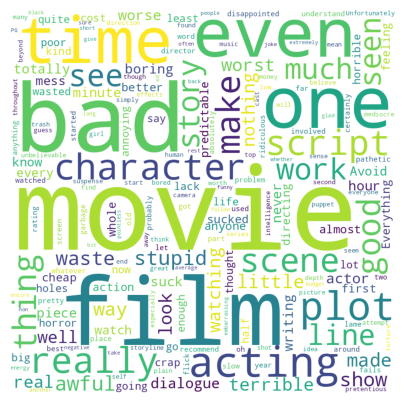

In [24]:
wc = WordCloud(width = 800, height = 800,
              background_color ='white',
              min_font_size = 10)

wc.generate(negative)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [25]:
# feature and target
# train test split

X = df["review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Tokenization

In [26]:
tok = Tokenizer()
tok.fit_on_texts(X_train)

In [27]:
vocabulary = tok.word_index

print(vocabulary)

vocab_length = len(vocabulary)

print(vocab_length)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'is': 5, 'this': 6, 'it': 7, 'i': 8, 'to': 9, 'in': 10, 'was': 11, 'movie': 12, 'film': 13, 'that': 14, 'for': 15, 'with': 16, 'as': 17, 'but': 18, 'are': 19, 'on': 20, 'not': 21, "it's": 22, 'just': 23, 'one': 24, 'you': 25, 'bad': 26, 'an': 27, 'all': 28, 'so': 29, 'about': 30, 'at': 31, 'very': 32, 'there': 33, 'like': 34, 'good': 35, 'by': 36, 'from': 37, 'have': 38, 'time': 39, 'he': 40, 'out': 41, 'even': 42, 'acting': 43, 'has': 44, 'his': 45, 'be': 46, 'were': 47, 'well': 48, 'if': 49, 'great': 50, 'who': 51, 'characters': 52, 'how': 53, 'more': 54, 'my': 55, 'or': 56, 'really': 57, 'see': 58, 'when': 59, 'some': 60, 'than': 61, 'no': 62, 'best': 63, 'plot': 64, 'made': 65, 'story': 66, 'movies': 67, 'character': 68, "didn't": 69, 'most': 70, 'scenes': 71, 'wonderful': 72, 'its': 73, 'better': 74, "don't": 75, '10': 76, 'me': 77, 'ever': 78, 'they': 79, 'what': 80, 'which': 81, 'also': 82, 'can': 83, 'only': 84, 'real': 85, 'work': 86, 'see

## Tokens to sequence

In [28]:
train_sequences = tok.texts_to_sequences(X_train)
print(train_sequences)

[[7, 912, 60, 913, 529, 16, 914, 2, 530, 2, 4, 531, 44, 915, 532, 102], [6, 5, 3, 377, 12], [18, 7, 5, 378, 916], [1, 533, 31, 917, 47, 918, 2, 66, 5, 29, 132, 7, 919, 534, 379, 30, 81, 535, 920, 3, 921, 922, 1, 923, 9, 244, 380, 381, 8, 23, 69, 297, 30, 107, 4, 6, 13, 2, 382, 21, 9, 245, 924, 213, 3, 925, 536, 9, 926, 537, 927], [1, 12, 44, 188, 62, 246, 71, 10, 7, 2, 32, 115, 214], [1, 928, 71, 19, 133, 929, 189, 34, 383, 930, 134, 247, 931, 932, 31, 384, 14, 19, 76, 933, 934, 4, 1, 935, 385], [936, 77, 3, 538, 18, 8, 91, 6, 5, 24, 4, 1, 63, 67, 78], [8, 116, 21, 937, 9, 42, 117, 7, 15, 32, 215, 15, 539, 4, 938, 8, 939], [22, 29, 26, 22, 147, 135, 216, 23, 15, 14, 540], [6, 12, 5, 82, 541], [6, 12, 5, 29, 386], [542, 940, 11, 387, 388], [22, 136, 543, 14, 6, 72, 13, 11, 65, 10, 941, 17, 544, 298, 108, 73, 942, 943, 10, 1, 944, 945, 217, 2, 299, 529, 31, 14, 39], [10, 248, 8, 148, 7, 74, 61, 946, 16, 3, 947, 2, 8, 148, 6, 948, 949, 950, 74, 61, 951, 389], [8, 300, 952, 1, 162, 39, 8, 

## Padding

In [29]:
doc_length = []

for doc in train_sequences:
  doc_length.append(len(doc))

print(doc_length)


[16, 5, 5, 51, 13, 25, 15, 17, 11, 5, 5, 5, 29, 22, 16, 16, 11, 35, 20, 10, 16, 29, 4, 2, 18, 14, 12, 12, 11, 12, 34, 30, 34, 28, 3, 45, 12, 6, 1, 36, 19, 7, 33, 35, 15, 11, 33, 19, 7, 5, 8, 12, 20, 10, 18, 7, 16, 6, 21, 11, 10, 3, 5, 8, 5, 6, 4, 6, 15, 34, 8, 21, 20, 29, 31, 4, 6, 9, 27, 11, 6, 34, 6, 38, 21, 20, 13, 8, 7, 25, 14, 18, 17, 18, 26, 7, 5, 3, 11, 17, 23, 8, 7, 12, 3, 2, 3, 11, 5, 5, 14, 12, 9, 14, 15, 9, 8, 12, 15, 26, 9, 3, 6, 24, 12, 10, 10, 10, 34, 28, 19, 10, 11, 24, 21, 27, 24, 4, 17, 10, 19, 20, 27, 16, 12, 33, 9, 12, 10, 6, 6, 2, 5, 4, 3, 15, 5, 16, 2, 7, 9, 18, 25, 25, 12, 12, 24, 33, 5, 13, 5, 4, 17, 23, 13, 7, 15, 21, 25, 8, 18, 11, 17, 12, 43, 25, 35, 5, 12, 12, 9, 24, 28, 5, 7, 10, 6, 6, 11, 6, 5, 6, 4, 5, 21, 7, 19, 20, 6, 3, 2, 16, 16, 18, 2, 12, 8, 4, 8, 19, 8, 25, 31, 14, 7, 2, 20, 14, 7, 57, 25, 19, 14, 2, 12, 27, 12, 33, 24, 14, 18, 5, 16, 10, 13, 5, 5, 3, 22, 9, 16, 28, 17, 11, 4, 9, 10, 9, 20, 13, 10, 7, 31, 11, 24, 7, 24, 16, 19, 21, 12, 3, 7, 36, 8, 

In [30]:
print("max length - ", max(doc_length))
print("99% qunatile - ", np.quantile(doc_length,0.99))
print("95% quantile- ", np.quantile(doc_length,0.95))
print("90% quantile- ", np.quantile(doc_length,0.90))

max length -  69
99% qunatile -  45.0
95% quantile-  33.0
90% quantile-  27.0


In [31]:
max_length = 45

In [32]:
train_matrix = sequence.pad_sequences(train_sequences,maxlen=max_length)
print(train_matrix )

[[  0   0   0 ... 915 532 102]
 [  0   0   0 ...   3 377  12]
 [  0   0   0 ...   5 378 916]
 ...
 [  0   0   0 ...   3  85  12]
 [  0   0   0 ...  20   2  20]
 [  0   0   0 ...  22 454 840]]


## Test data

In [33]:
test_sequences = tok.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequences,maxlen=max_length)
print(test_matrix)

[[  0   0   0 ...   3 388 111]
 [  0   0   0 ...   9 101  77]
 [  0   0   0 ...  42  35  15]
 ...
 [  0   0   0 ...   3  35 222]
 [  0   0   0 ...  22  23 551]
 [  0   0   0 ...  12   5 128]]


In [34]:
model = Sequential()
model.add(Embedding(input_dim=vocab_length+1,
                    output_dim=32,
                    input_length=max_length,
                    mask_zero=True))
model.add(Flatten())
model.add(Dense(64, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

model.fit(train_matrix, y_train, epochs=10, batch_size=32)

Epoch 1/10
22/22 [==============================] - 1s 6ms/step - loss: 0.6987
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6707
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5026
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1315
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.0256
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 7/10
22/22 [==============================] - 0s 7ms/step - loss: 0.0057
Epoch 8/10
22/22 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 9/10
22/22 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 10/10
22/22 [==============================] - 0s 6ms/step - loss: 0.0029


In [35]:
y_pred = model.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       151
           1       0.68      0.62      0.65       149

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300



In [42]:
import numpy as np
import pandas as pd
embeddings_index={}
f=open("/content/glove.6B.100d.txt",encoding="utf-8")
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:],dtype="float32")
  embeddings_index[word]=coefs
f.close()

In [43]:
embedding_dim=100
embedding_matrix=np.zeros((vocab_length+1,embedding_dim))
for word,i in tok.word_index.items():
  embedding_vector=embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [44]:
model=Sequential()
model.add(Embedding(vocab_length+1,
                    embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=False))

model.add(Flatten())
model.add(Dense(64, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

model.fit(train_matrix, y_train, epochs=10, batch_size=32)

Epoch 1/10
22/22 [==============================] - 1s 6ms/step - loss: 0.6931
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 0.5004
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 0.3002
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 0.1668
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1032
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1062
Epoch 7/10
22/22 [==============================] - 0s 7ms/step - loss: 0.1072
Epoch 8/10
22/22 [==============================] - 0s 6ms/step - loss: 0.0556
Epoch 9/10
22/22 [==============================] - 0s 7ms/step - loss: 0.0297
Epoch 10/10
22/22 [==============================] - 0s 7ms/step - loss: 0.0206


In [45]:
y_pred = model.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       151
           1       0.66      0.68      0.67       149

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300

